In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv('datasets/train.csv', usecols=['Age', 'Fare', 'Survived'])

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(714, 3)

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [13]:
clf = DecisionTreeClassifier()

In [14]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.6223776223776224

In [16]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

0.6303208137715179

In [39]:
# Apply Discretizer

kbin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [40]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [41]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.fit_transform(X_test)

In [42]:
# CHECK THE BINS 

trf.named_transformers_['first'].bin_edges_
trf.named_transformers_['second'].bin_edges_

array([array([  0.     ,   7.74336,   7.925  ,   8.6625 ,  10.5    ,  14.4542 ,
               22.62   ,  28.39   ,  38.1    ,  57.78336, 512.3292 ])          ],
      dtype=object)

In [43]:
# Compare how the columns have changed after the transform?

output = pd.DataFrame({
    'age': X_train['Age'],
    'age_trf': X_train_trf[:, 0],
    'fare': X_train['Fare'],
    'fare_trf': X_train_trf[:, 1]
})

In [44]:
output['age_labels'] = pd.cut(x=X_train['Age'], bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'], bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [45]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
614,35.0,6.0,8.0500,2.0,"(34.4, 38.6]","(7.925, 8.662]"
145,19.0,2.0,36.7500,7.0,"(17.0, 20.6]","(28.39, 38.1]"
268,58.0,9.0,153.4625,9.0,"(47.8, 62.0]","(57.783, 512.329]"
52,49.0,8.0,76.7292,8.0,"(47.8, 62.0]","(57.783, 512.329]"
204,18.0,1.0,8.0500,2.0,"(17.0, 20.6]","(7.925, 8.662]"


In [46]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test, y_pred2)

0.6853146853146853

# Method to all the steps that we did above...

In [47]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    trf = ColumnTransformer([
        ('first', kbin_age, [0]),
        ('second', kbin_fare, [1])
    ])
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy')))

    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Age: Before Xform')

    plt.subplot(122)
    plt.hist(X_trf[:, 0], color='red')
    plt.title('Age: After Xform')

    plt.show()
    
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Fare: Before Xform')

    plt.subplot(122)
    plt.hist(X_trf[:, 1], color='red')
    plt.title('Fare: After Xform')
    
    plt.show()

0.6331377151799686


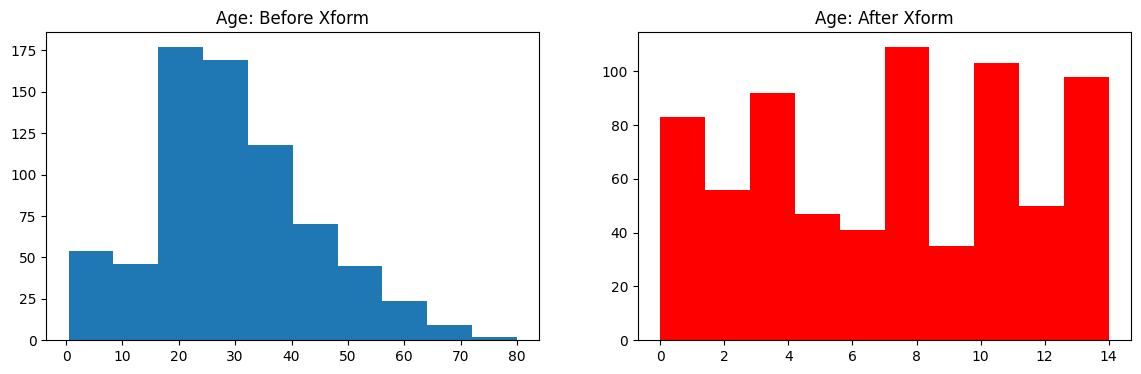

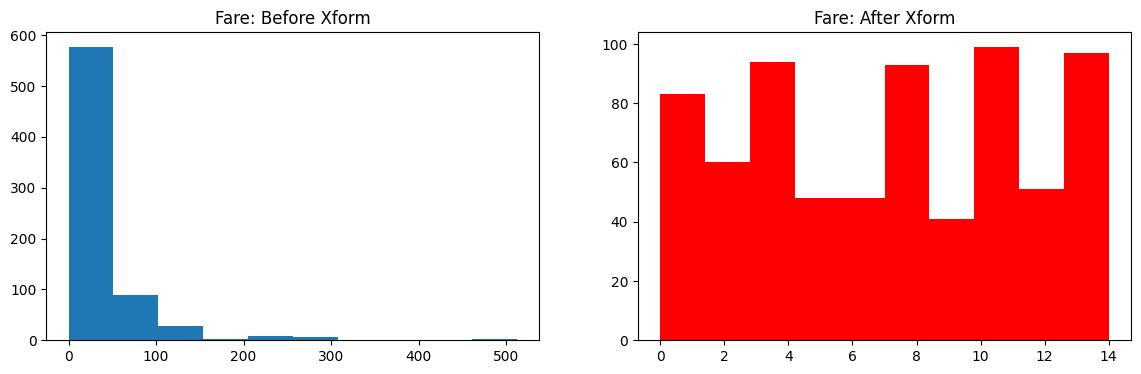

In [55]:
discretize(15, 'quantile')

# CUSTOME BINNING

In [56]:
# When we have knowledge of how to bin the data, because we have domain knowledge we know what it is...
# we can use that to create custome bins
# Cannot be done using sklearn, but we have to write own logic using pandas from scratch...

In [57]:
# Binarization
# - This is the  way of converting discrete value into a binary variable (is true/not) or (is greater than K) etc.
# - most commonly used during image processing

In [58]:
# in sklearn, it takes in 2 inputs => threshold: the value which acts as the boundary
# copy => the value determinies if we want to replace inplace (false) or make new column (true)

In [59]:
df_bin = pd.read_csv('datasets/train.csv', usecols=['Age', 'Fare', 'SibSp', 'Parch', 'Survived'])

In [60]:
df_bin.dropna(inplace=True)

In [61]:
df_bin.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [63]:
df_bin['Family'] = df_bin['SibSp'] + df_bin['Parch']

In [65]:
df_bin.drop(columns=['SibSp', 'Parch'], inplace=True)

In [66]:
df_bin.head()

,Survived,Age,Fare,Family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [68]:
X = df_bin.drop(columns=['Survived'])
y = df_bin['Survived']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
X_train.head()

,Age,Fare,Family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [87]:
# Without binarization
clf = DecisionTreeClassifier()

In [88]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.6363636363636364

In [89]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

0.6471439749608765

In [90]:
# Apply binarization
from sklearn.preprocessing import Binarizer

In [92]:
trf = ColumnTransformer([
    ('bin', Binarizer(copy=False), ['Family'])
], remainder='passthrough')

In [93]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [94]:
pd.DataFrame(X_train_trf, columns=['Family', 'Age', 'Fare'])

,Family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [104]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test, y_pred2)

0.6363636363636364

In [107]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), X_trf, y, cv=10, scoring='accuracy'))

0.6373826291079812

In [108]:
# Not the best example to understand how we can improve... But this most probably will not show improvement
# Because it is a forced example